<a href="https://colab.research.google.com/github/kelvynlukito/Lead_Scoring_Ads_PTXYZ/blob/main/Lead_Scoring_ADS_Bagging_PT_XYZ_ModelWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lead Scoring Project**

## **Install Depedencies & Import Libraries**

In [2]:
# Database Depedencies
!pip install pymysql
!pip install sqlalchemy
!pip install psycopg2
!pip install mysql-connector-python
!pip install psycopg2-binary

# Model & Pipeline Depedencies
!pip install mlflow
!pip install scikit-learn

# Deploy Environment Depedencies
!pip install streamlit

# Output dependies
!pip install gspread oauth2client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 641.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 39.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.3.3 requires jax>=0.4.9, but you have jax 0.3.25 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## **Import Dataset**

In [5]:
# Read dataset for excel file
def read_dataset_excel(file_path):
  df = pd.read_excel(file_path)
  return df

# Read dataset for csv file
def read_dataset_csv(file_path):
  df = pd.read_csv(file_path, on_bad_lines='skip')
  return df

# read dataframe from local filepath
def read_dataframe(file_path):
  if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
  elif file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
  else:
    print('')
    print("\033[1;41;40m Format File is not supported. Please upload a CSV or Excel File. \n")
    print('')
    df = None
  return df

### **Get Data from Uploaded File**

In [6]:
from google.colab import files

# function upload file
def upload_file():
    try:
        # Upload a single file
        uploaded = files.upload()

        # Check if any files were uploaded
        if not uploaded:
            print('')
            print("\033[1;41;40m Format File is not supported. Please upload a CSV or Excel File. \n")
            print('')

            return None

        # Access the uploaded file
        for filename, content in uploaded.items():
            with open(filename, 'wb') as f:
                f.write(content)
            print('')
            print(f"\033[1;32;40m '{filename}' uploaded successfully! \n")
            print('')

        return uploaded

    except Exception as e:
        print('')
        print(f"\033[1;41;40m An error occurred during file upload: {str(e)} \n")
        print('')

        return None

    except Exception as e:
        print('')
        print(f"\033[1;41;40m An error occurred during file upload: {str(e)} \n")
        print('')

        return None


import os

# function checking file format
def check_file_format(file_name):
  new_file_path = ''
  if file_name.endswith('.csv'):
    # Define the current and new file paths
    current_file_path = f'/content/{file_name}'  # Replace with your current file path
    new_file_path = "/content/dataset.csv"  # Replace with your new file path

    # Rename the file
    os.rename(current_file_path, new_file_path)
    print('')
    print(f"\033[1;32;40m File has been check & renamed successfully. \n")
    print('')

  elif file_name.endswith('.xlsx'):
    # Define the current and new file paths
    current_file_path = f'/content/{file_name}'  # Replace with your current file path
    new_file_path = "/content/dataset.xlsx"  # Replace with your new file path

    # Rename the file
    os.rename(current_file_path, new_file_path)
    print('')
    print(f"\033[1;32;40m File has been check & renamed successfully. \n")
    print('')

  else:
    print('')
    print("\033[1;41;40m Please Upload File with .csv or .xlsx Format \n")
    print('')

  return new_file_path

### **Get Data from Spredsheet or Gdrive**

In [7]:
from google.colab import auth
import gspread
from google.auth import default
from gspread.exceptions import SpreadsheetNotFound

def get_data_gdrive():
    auth.authenticate_user()
    creds, _ = default()

    try:
        gc = gspread.authorize(creds)
    except gspread.exceptions.APIError as e:
        error_message = str(e)
        if "401" in error_message and "Invalid Credentials" in error_message:
            raise Exception("Authentication failed. Make sure you have the correct credentials.") from e
        else:
            raise Exception("An error occurred while accessing the spreadsheet.") from e

    data_url = input("Spreadsheet URL: ")  # Read the URL instead of name

    try:
        # Open the spreadsheet by URL
        spreadsheet = gc.open_by_url(data_url)
        worksheet = spreadsheet.sheet1
    except SpreadsheetNotFound as e:
        raise Exception(f"The spreadsheet at URL '{data_url}' was not found.") from e

    # get_all_values gives a list of rows.
    rows = worksheet.get_all_values()
    print(rows)

    # Convert to a DataFrame and render.
    import pandas as pd
    df = pd.DataFrame.from_records(rows[1:], columns=rows[0])
    print('')
    print("\033[1;32;40m Data has been input successfully \n")
    print('')
    return df

### **Get Data from BigQuery**

In [8]:
# libraries
"""
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

def get_data_bigquery():
  project = '' # Project ID insert based on the query result selected to explore
  location = '' # Location insert based on the query result selected to explore

  try:
    client = bigquery.Client(project=project, location=location)
    data_table.enable_dataframe_formatter()
    auth.authenticate_user()
  except EnvironmentError as e:
    raise Exception("Authentication failed. Make sure you have the correct credentials.") from e

  job = client.get_job('') # Job ID based on the query result selected to explore
  result = job.to_dataframe()
  return result
"""

'\nfrom google.colab import auth\nfrom google.cloud import bigquery\nfrom google.colab import data_table\n\ndef get_data_bigquery():\n  project = \'\' # Project ID insert based on the query result selected to explore\n  location = \'\' # Location insert based on the query result selected to explore\n\n  try:\n    client = bigquery.Client(project=project, location=location)\n    data_table.enable_dataframe_formatter()\n    auth.authenticate_user()\n  except EnvironmentError as e:\n    raise Exception("Authentication failed. Make sure you have the correct credentials.") from e\n\n  job = client.get_job(\'\') # Job ID based on the query result selected to explore\n  result = job.to_dataframe()\n  return result\n'

### **Get Data from MySQL**

In [9]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

def get_data_mysql():
    # Replace the following with your MySQL credentials
    DB_HOST = 'your_database_host'
    DB_USER = 'your_database_user'
    DB_PASSWORD = 'your_database_password'
    DB_NAME = 'your_database_name'
    TABLE_NAME = 'your_table_name'

    try:
        # Establish a connection to the MySQL server
        connection = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)

        # Create a pandas DataFrame by querying the MySQL table
        query = f"SELECT * FROM {TABLE_NAME};"
        df = pd.read_sql_query(query, connection)

        # Close the connection to the database
        connection.close()

        return df

    except Exception as e:
        print(f"Error: {e}")
        return None

### **Get Data from PostgreSQL**

In [10]:
def get_data_postgresql():
    # Replace the following with your PostgreSQL credentials
    DB_HOST = 'your_database_host'
    DB_USER = 'your_database_user'
    DB_PASSWORD = 'your_database_password'
    DB_NAME = 'your_database_name'
    TABLE_NAME = 'your_table_name'

    try:
        # Establish a connection to the PostgreSQL server
        engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}')

        # Create a pandas DataFrame by querying the PostgreSQL table
        query = f"SELECT * FROM {TABLE_NAME};"
        df = pd.read_sql_query(query, engine)

        return df

    except Exception as e:
        print(f"Error: {e}")
        return None

## **Data Preparation**

In [11]:
def choose_data_source():
  print("="*40)
  print("Choose Data Source")
  print("1. Upload File to Collab")
  print("2. Get from Spreadsheet Google Drive")
  print("3. Get from Qontak API")
  print("4. Get from Google Big Query")
  print("5. Get from mySQL")
  print("6. Get from PostgreSQL")
  num = int(input("Choose Data Source [1/2/3/4/5/6] : "))
  print("="*40)
  df = ""
  service_code = [1,2,3,4,5,6]
  while num not in service_code:
    print("Please select the data source service code that available")
    num = int(input("Choose Data Source [1/2/3/4/5/6] : "))
  if num == 1:
    # upload file
    file = upload_file()

    # Check file_name
    if file != None:
      # get file name
      file_name = list(file.keys())[0]

      # get new file path
      file_path = check_file_format(file_name)

      # return data source
      df = read_dataframe(file_path)
    else:
      print('')
      print(f"\033[1;32;40m No Such File Uploaded \n")
      print('')

  elif num == 2:
    # call get_data_gdrive
    df = get_data_gdrive()

  elif num == 3:
    print('Feature release soon')
    """
    # call get_data_qontakAPI()
    df = get_data_qontakAPI()
    """

  elif num == 4:
    print('Feature release soon')
    """
    # call get_data_bigquery()
    df = get_data_bigquery()
    """

  elif num == 5:
    # call get_data_mysql
    df = get_data_mysql()

  elif num == 6:
    # call get_data_postgresql()
    df = get_data_postgresql()

  return df

In [17]:
dataset = choose_data_source()

Choose Data Source
1. Upload File to Collab
2. Get from Spreadsheet Google Drive
3. Get from Qontak API
4. Get from Google Big Query
5. Get from mySQL
6. Get from PostgreSQL
Choose Data Source [1/2/3/4/5/6] : 1


Saving data_leads_20k.csv to data_leads_20k.csv

 'data_leads_20k.csv' uploaded successfully! 



 File has been check & renamed successfully. 




In [18]:
dataset

,Unnamed: 0,Timestamp (YYYY/MM/DD),Sumber Data,Kegiatan,Prodi Peminatan,Status BC,Belum di BC,Sudah di BC,Cek Beli PIN (Email),Cek Beli PIN (HP),Beli PIN,Sudah Beli PIN,Cek Registrasi (Email),Registrasi,Sudah Registrasi,BC Kegiatan
0,257160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102371,2022/10/28,Kerjasama,POSI,NaN,Belum di BC,Belum di BC,NaN,NaN,NaN,Belum,NaN,NaN,Belum,NaN,Kerjasama Mitra-POSI
2,187174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,267641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,203086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20468,2021/07/01,Kerjasama,Masuk Kampus,S1 Akuntansi,Belum di BC,Belum di BC,NaN,NaN,NaN,Belum,NaN,NaN,Belum,NaN,Kerjasama Mitra-Masuk Kampus
19996,121009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,21332,2021/07/01,Kerjasama,Masuk Kampus,S1 Akuntansi,Belum di BC,Belum di BC,NaN,NaN,NaN,Belum,NaN,NaN,Belum,NaN,Kerjasama Mitra-Masuk Kampus
19998,262931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dataset.columns = dataset.columns.str.lower()

In [ ]:
df = dataset.drop(['prospect_id'],axis=1)

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.info()

### **Checking NaN / Null Value**

In [ ]:
df.isna().sum()

### **Exploratory Data Analysis**

In [ ]:
def plot_categorical_subplots(data_frame):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns

    num_columns = len(categorical_columns)
    num_cols = 2
    num_rows = (num_columns + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))

    # Flatten the axes array if needed
    if num_columns > 1:
        axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        ax = axes[i]
        sns.countplot(x=column, data=data_frame, ax=ax)
        ax.set_title(f'Countplot of {column}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        ax.set_xlabel(column)

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
plot_categorical_subplots(df)

In [ ]:
def plot_numeric_boxplots(data_frame):
    numeric_columns = data_frame.select_dtypes(include=['number']).columns

    num_columns = len(numeric_columns)
    num_cols = 1
    num_rows = (num_columns + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))

    # Flatten the axes array if needed
    if num_columns > 1:
        axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        ax = axes[i]
        sns.boxplot(x=column, data=data_frame, ax=ax)
        ax.set_title(f'Boxplot of {column}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        ax.set_xlabel(column)

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
plot_numeric_boxplots(df)

### **Remove Outliers**

In [ ]:
# Remove outliers
def remove_outliers_zscore(data_frame, z_threshold=3):
    numeric_columns = data_frame.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        z_scores = np.abs((data_frame[column] - data_frame[column].mean()) / data_frame[column].std())
        data_frame = data_frame[z_scores < z_threshold]

    return data_frame

In [ ]:
df = remove_outliers_zscore(df, z_threshold=3)
plot_numeric_boxplots(df)

## **Train Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

df_input_model = df.drop('converted', axis=1)

X = df_input_model
y = df[['converted']]

categorial_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['number']).columns

# Split the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **Modeling with Bagging Method**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Define base classifiers
svm_classifier = SVC(C=1, gamma='scale', kernel='rbf', probability=True, random_state=42)
rf_classifier = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
lr_classifier = LogisticRegression(C= 1, max_iter=100, penalty='l1', solver='liblinear',random_state=42)

# Create a voting ensemble of the base classifiers
voting_ensemble = VotingClassifier(estimators=[('rf', rf_classifier),
                                   # ('lr', lr_classifier),
                                   ('svm', svm_classifier)],
                                   voting='soft')  # 'soft' for probability-based voting

# Create a bagging ensemble of the voting ensemble
bagging_ensemble = BaggingClassifier(estimator=voting_ensemble,
                                        n_estimators=50,  # Number of base estimator
                                        random_state=42)

## **Build Pipeline**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
import numpy as np

class CategoricalToNumericTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {}

    def fit(self, X, y=None):
        num_cols = np.arange(X.shape[1])
        cat_cols = []

        for column in num_cols:
            unique_values = np.unique(X[:, column])
            if len(unique_values) < X.shape[0] // 2:  # Adjust the threshold as needed
                cat_cols.append(column)

        for column in cat_cols:
            le = LabelEncoder()
            le.fit(X[:, column])
            self.label_encoders[column] = le

        return self

    def transform(self, X):
        X_transformed = X.copy()

        for column, le in self.label_encoders.items():
            if column < X.shape[1]:
                X_transformed[:, column] = le.transform(X[:, column])
            else:
                # Handle unseen labels by setting them to a default value
                X_transformed[:, column] = le.transform(["<unknown>"] * X.shape[0])

        return X_transformed

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Define the preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, X_train.select_dtypes(include=['object']).columns),
        ('num', numeric_transformer, X_train.select_dtypes(include=['number']).columns)
    ]
)

# Define the bagging ensemble pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('bagging', bagging_ensemble),
])

# Load the dataset (for example, using the Iris dataset)
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Evaluation**

### **Metrics Evaluation**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Calculate precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Create a DataFrame
metrics_data = {
    'model': ['Pipeline_ensemble_lead_scoring'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1],
    'training': [len(X_train)],
    'testing': [len(X_test)]
}

metrics_df = pd.DataFrame(metrics_data)

Accuracy: 0.921311475409836
Precision: 0.9213886210221794
Recall: 0.921311475409836
F1-score: 0.9208837122546684


In [ ]:
metrics_df

,model,accuracy,precision,recall,f1_score,training,testing
0,Pipeline_ensemble_lead_scoring,0.921311,0.921389,0.921311,0.920884,3656,915


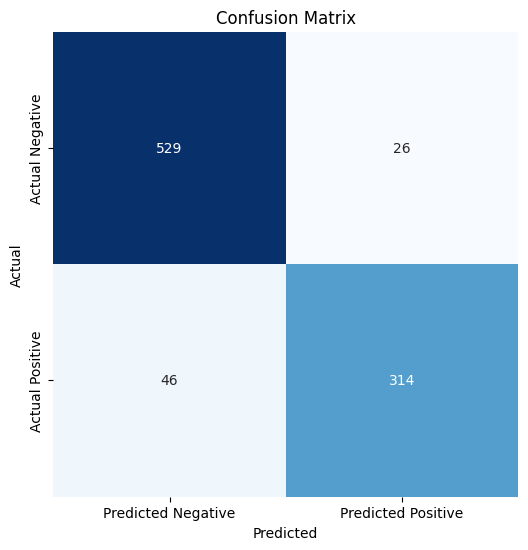

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def show_roc_curve(y_test, y_pred):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()

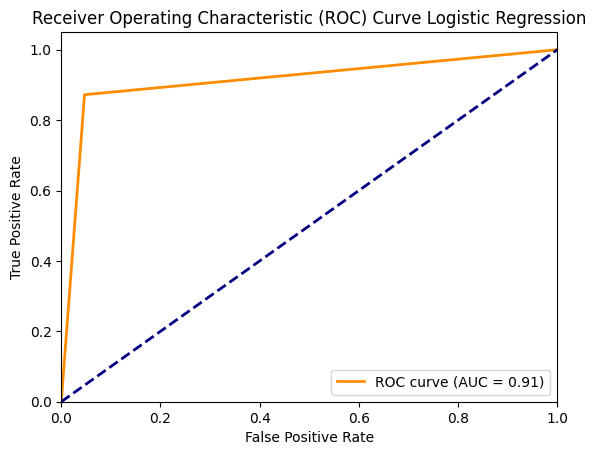

In [ ]:
show_roc_curve(y_test, y_pred)

### **Hyperparameter Tunning**

Logistic Regression
1.   Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
2.   Best Accuracy: 0.8543566633588231



Random Forest
1.   Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
2.   Best Accuracy: 0.9202556768431499



Support Vector Classifier
1.   Best SVC Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
2.   Best SVC Accuracy: 0.8804980444807657

## **Save Model**

In [ ]:
from joblib import dump

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the folder path on Google Drive
drive_folder_path = '/content/drive/MyDrive/lead scoring/'

# Save the model
model_filename = 'model_pipeline.joblib'
model_path = drive_folder_path + model_filename
dump(model_pipeline, model_path)

print(f"\033[1;32;40m Model saved to {model_path} \n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Model saved to /content/drive/MyDrive/Kerja Praktek/PADMI Telkom/model_pipeline.joblib 



## **Save Model Performance**

In [ ]:
import pandas as pd
import mysql.connector
from datetime import datetime

# get connection to mysql
def connect_mysql(host, username, password, database):
  try:
    connection = mysql.connector.connect(
    host=host,
    user=username,
    password=password,
    database=database
    )
    print("\033[1;32;40m Connected to MySQL database successfully. \n")
    return connection
  except mysql.connector.Error as err:
    raise Exception(f"An error occurred while connecting to MySQL database: {err}") from err

# post data to mysql table
def post_data_mysql(dataframe, connection, table_name):
    try:
        cursor = connection.cursor()

        create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ("
        create_table_query += "id INT AUTO_INCREMENT PRIMARY KEY, "  # Add the 'id' column

        # Mapping Pandas DataFrame dtypes to MySQL data types
        dtype_mapping = {
            'int64': 'INT',
            'float64': 'FLOAT',
            'object': 'LONGTEXT',
        }

        for col_name, col_type in zip(dataframe.columns, dataframe.dtypes):
            mysql_data_type = dtype_mapping.get(str(col_type), 'LONGTEXT')

            # Enclose reserved keywords in backticks
            if col_name in ['precision', 'recall', 'f1_score']:
                col_name = f"`{col_name}`"

        create_table_query += f"{col_name} {mysql_data_type}, "

        # Add 'created_at' column with TIMESTAMP data type and default value as CURRENT_TIMESTAMP
        create_table_query += "created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP"

        create_table_query = create_table_query.rstrip(", ") + ")"
        cursor.execute(create_table_query)

        # Insert data into the table, excluding the 'create_at' column
        insert_query = f"INSERT INTO {table_name} ("
        insert_query += ", ".join(f"`{col}`" for col in dataframe.columns)
        insert_query += f") VALUES ({', '.join(['%s' for _ in dataframe.columns])})"

        data_to_insert = [tuple(row) for row in dataframe.values]
        cursor.executemany(insert_query, data_to_insert)

        connection.commit()
        print("\033[1;32;40m DataFrame has been successfully saved to MySQL. \n")

    except mysql.connector.Error as err:
        connection.rollback()
        raise Exception(f"An error occurred while saving the DataFrame to MySQL: {err}") from err

In [ ]:
# Define data performance from model
data_model = metrics_df

# Replace 'your_host', 'your_username', 'your_password', 'your_database', and 'your_table_name' with appropriate values
host = 'db4free.net'
username = 'smbtelkom'
password = 'smbtelkom'
database = 'smbtelkom'
table_name = 'lead_model'

try:
    # Connect to MySQL
    connection = connect_mysql(host, username, password, database)

    # Save DataFrame to MySQL
    post_data_mysql(data_model, connection, table_name)

except Exception as e:
    print(e)

finally:
    # Close the connection after saving (if it is not already closed)
    if connection is not None and connection.is_connected():
      connection.close()

 Connected to MySQL database successfully. 

 DataFrame has been successfully saved to MySQL. 



## **Main.py**

In [16]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
from datetime import datetime

# get connection to mysql
def connect_mysql(host, username, password, database):
    try:
        connection = mysql.connector.connect(
            host=host,
            user=username,
            password=password,
            database=database
        )
        print("\033[1;32;40m Connected to MySQL database successfully. \n")
        return connection
    except mysql.connector.Error as err:
        raise Exception(f"An error occurred while connecting to MySQL database: {err}") from err

def mysql_data_type(pandas_dtype):
    type_mapping = {
        'int64': 'INT',
        'float64': 'FLOAT',
        'object': 'VARCHAR(255)',
    }
    return type_mapping.get(pandas_dtype.name, 'VARCHAR(255)')

def post_data_mysql(dataframe, connection, table_name):
    try:
        if connection.is_connected():
            cursor = connection.cursor()

            # Create the table if it doesn't exist
            create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ("
            create_table_query += "entry_id INT AUTO_INCREMENT PRIMARY KEY, "  # Add the 'entry_id' column

            for col_name, col_type in zip(dataframe.columns, dataframe.dtypes):
                mysql_data_type_str = mysql_data_type(col_type)
                create_table_query += f"{col_name} {mysql_data_type_str}, "

            # Add 'created_at' column with TIMESTAMP data type and default value as CURRENT_TIMESTAMP
            create_table_query += "created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP)"

            cursor.execute(create_table_query)

            # Insert data into the table, excluding the 'created_at' column
            insert_query = f"INSERT INTO {table_name} ({', '.join(dataframe.columns)}) VALUES ({', '.join(['%s' for _ in dataframe.columns])})"
            data_to_insert = [tuple(row) for row in dataframe.values]
            cursor.executemany(insert_query, data_to_insert)

            connection.commit()
            print("\033[1;32;40m DataFrame has been successfully saved to MySQL. \n")

    except mysql.connector.Error as err:
        connection.rollback()
        raise Exception(f"An error occurred while saving the DataFrame to MySQL: {err}") from err


import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

def post_to_gdrive(df):
    # Get autenticate
    auth.authenticate_user()

    creds, _ = default()

    gc = gspread.authorize(creds)

    # Open the Google Sheet (replace 'Your Spreadsheet Name' with your actual sheet name)
    print("1. Siapkan Sheet Kosong Pada Google Drive Anda")
    print("2. Perhatikan Ejaan dan Kapitalisasi Huruf pada Nama Sheet")
    sheet_name = input("Masukkan Nama Spreadsheet : ")
    sheet = gc.open(sheet_name)

    # Select the worksheet (replace 'Sheet1' with your actual sheet name)
    worksheet = sheet.worksheet('Sheet1')

    # Replace out-of-range float values with 0
    df = df.replace(to_replace=np.nan, value='')

    # Convert DataFrame to a list of lists and update the worksheet
    header = df.columns.tolist()
    values = [header] + df.values.tolist()
    worksheet.append_rows(values)

    print("\033[1;32;40m DataFrame has been successfully saved to google drive. \n")


from joblib import load  # Import the load function

def main():
    # File Upload
    data = choose_data_source()

    data.columns = data.columns.str.lower()
    input_model = data.drop('prospect_id',axis=1)
    input_model = data.drop('converted', axis=1)

    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Define model path
    model_path = '/content/drive/MyDrive/lead scoring/model_pipeline.joblib'

    # Load the model
    saved_model = load(model_path)

    # Preprocess the data and make predictions
    predictions = saved_model.predict(input_model)

    # Display predictions
    print(predictions)

    # Merge predictions with main data
    data['predictions'] = predictions

    # Show main data
    data.head()

    # Stored output to database
    leads = data

    # Stored output to drive
    post_to_gdrive(leads)

    # Replace 'your_host', 'your_username', 'your_password', 'your_database', and 'your_table_name' with appropriate values
    host = 'db4free.net'
    username = 'smbtelkom'
    password = 'smbtelkom'
    database = 'smbtelkom'
    table_name = 'leads'

    try:
        # Connect to MySQL
        connection = connect_mysql(host, username, password, database)

        # Save DataFrame to MySQL
        post_data_mysql(leads, connection, table_name)

    except Exception as e:
        print(e)

    finally:
        # Close the connection after saving (if it is not already closed)
        if connection is not None and connection.is_connected():
            connection.close()

if __name__ == "__main__":
    main()

Choose Data Source
1. Upload File to Collab
2. Get from Spreadsheet Google Drive
3. Get from Qontak API
4. Get from Google Big Query
5. Get from mySQL
6. Get from PostgreSQL
Choose Data Source [1/2/3/4/5/6] : 1


Saving Leads.csv to Leads.csv

 'Leads.csv' uploaded successfully! 



 File has been check & renamed successfully. 


[0. 0. 1. ... 0. 1. 1.]
 DataFrame has been successfully saved to MySQL. 

 Connected to MySQL database successfully. 

An error occurred while saving the DataFrame to MySQL: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'activity VARCHAR(255), country VARCHAR(255), specialization VARCHAR(255), how di' at line 1
